In [15]:
import os
import cv2
import numpy as np


# Chemin du dossier contenant les images
folder_path = 'C:\\Users\\Epssilony\\Downloads\\data_players'

# Liste des noms de fichiers dans le dossier
file_names = os.listdir(folder_path)

# Anciens indices et nouveaux indices
old_indices = [0, 1, 2, 5, 6, 10, 15]

# Créer des listes pour stocker les images et les étiquettes associées
images = []
labels = []

# Parcourir les fichiers du dossier et charger les images correspondantes
for file_name in file_names:
    # Extraire l'indice du fichier
    index = int(file_name.split('_')[0])
    
    # Vérifier si l'indice est dans la liste des anciens indices, sinon ignorer
    if index in old_indices:
        new_index = old_indices.index(index)
        
        # Charger l'image en niveau de gris
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Ajouter l'image et l'étiquette aux listes
        if image is not None:
            images.append(image)
            labels.append(new_index)

# Convertir les listes en tableaux numpy
images = np.array(images)
labels = np.array(labels)

# Vérifier la forme des tableaux numpy créés
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


Shape of images array: (10326, 100, 100)
Shape of labels array: (10326,)


In [74]:
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Fonction pour extraire les caractéristiques LBP
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)  # Normalisation
        lbp_features.append(hist)
    return np.array(lbp_features)

# Extraction des caractéristiques LBP des images
lbp_images = extract_lbp_features(images)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(lbp_images, labels, test_size=0.2, random_state=42)

# Définir les valeurs des hyperparamètres à rechercher
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Effectuer une recherche sur grille avec validation croisée
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Évaluer le modèle avec la validation croisée
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
mean_cv_accuracy = np.mean(cv_scores)
print(f"Précision moyenne de la validation croisée : {mean_cv_accuracy}")

# Entraîner le modèle sur l'ensemble de données d'entraînement
best_model.fit(X_train, y_train)

# Évaluer le modèle SVM sur l'ensemble de données de test
svm_accuracy = best_model.score(X_test, y_test)
print(f"Précision du modèle SVM sur les données de test : {svm_accuracy}")


Meilleurs hyperparamètres : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Précision moyenne de la validation croisée : 0.44104116222760287
Précision du modèle SVM sur les données de test : 0.43368828654404645


In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Définir les valeurs des hyperparamètres à rechercher pour KNN
k_values = [3, 5, 7] 

# Effectuer une recherche sur grille avec validation croisée pour KNN
param_grid_knn = {'n_neighbors': k_values}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés pour KNN
print("Meilleurs hyperparamètres pour KNN :", grid_search_knn.best_params_)

# Utiliser le modèle KNN avec les meilleurs paramètres
best_model_knn = grid_search_knn.best_estimator_

# Évaluer le modèle KNN avec la validation croisée
cv_scores_knn = cross_val_score(best_model_knn, X_train, y_train, cv=5)
mean_cv_accuracy_knn = np.mean(cv_scores_knn)
print(f"Précision moyenne de la validation croisée pour KNN : {mean_cv_accuracy_knn}")

# Entraîner le modèle sur l'ensemble de données d'entraînement avec les meilleurs paramètres
best_model_knn.fit(X_train, y_train)

# Évaluer le modèle KNN sur l'ensemble de données de test
knn_accuracy = best_model_knn.score(X_test, y_test)
print(f"Précision du modèle KNN sur les données de test : {knn_accuracy}")


Meilleurs hyperparamètres pour KNN : {'n_neighbors': 3}
Précision moyenne de la validation croisée pour KNN : 0.6429782082324456
Précision du modèle KNN sur les données de test : 0.6834462729912875


In [18]:
import pandas as pd

# Charger les caractéristiques LBP et les étiquettes dans un DataFrame
lbp_df = pd.DataFrame(X_train) 
lbp_df['Labels'] = y_train 

# Enregistrer les caractéristiques LBP dans un fichier CSV
csv_lbp_file_path = 'lbp_features.csv'
lbp_df.to_csv(csv_lbp_file_path, index=False)

print(f"Les caractéristiques LBP ont été enregistrées dans '{csv_lbp_file_path}'.")


Les caractéristiques LBP ont été enregistrées dans 'lbp_features.csv'.


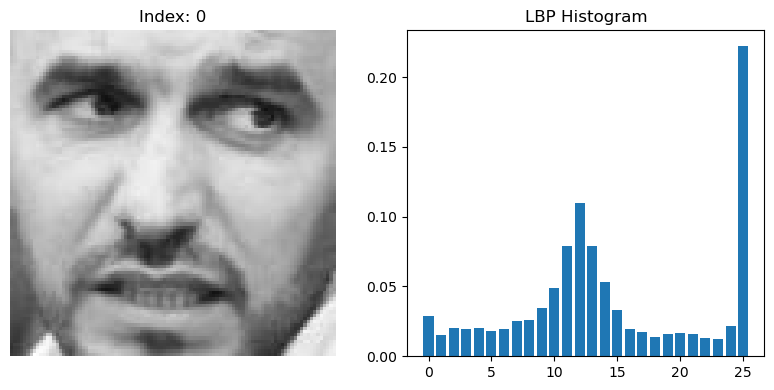

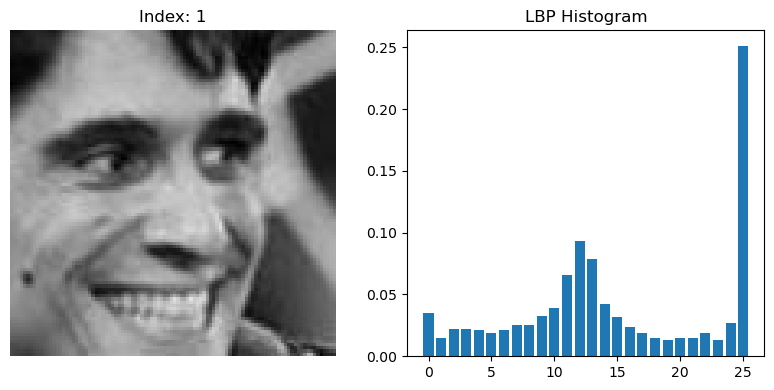

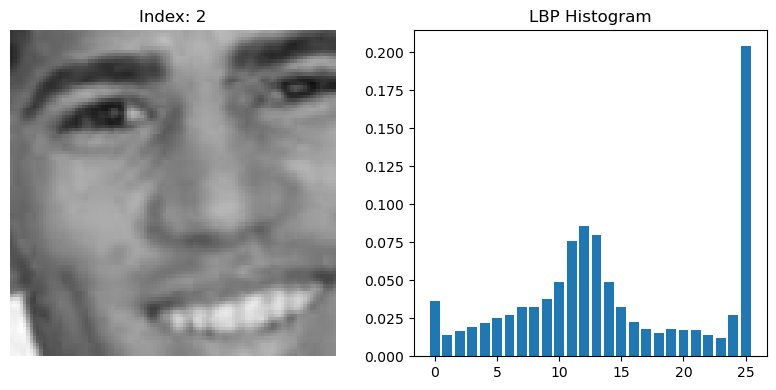

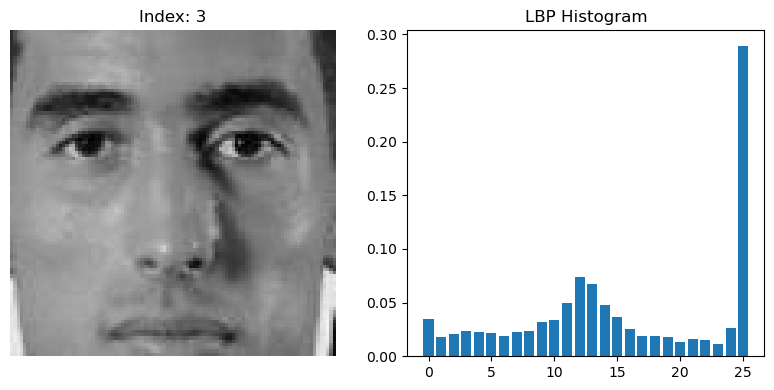

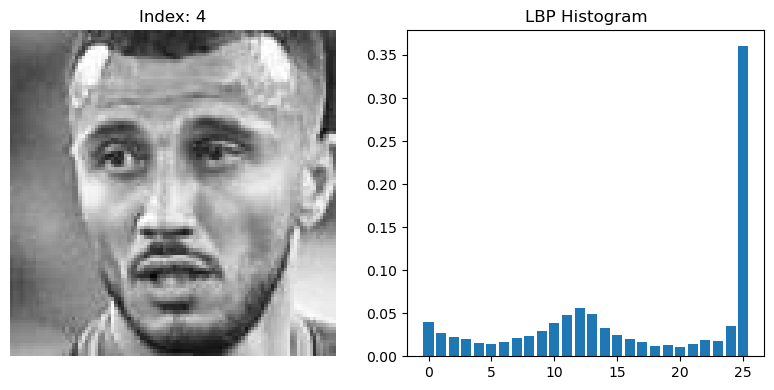

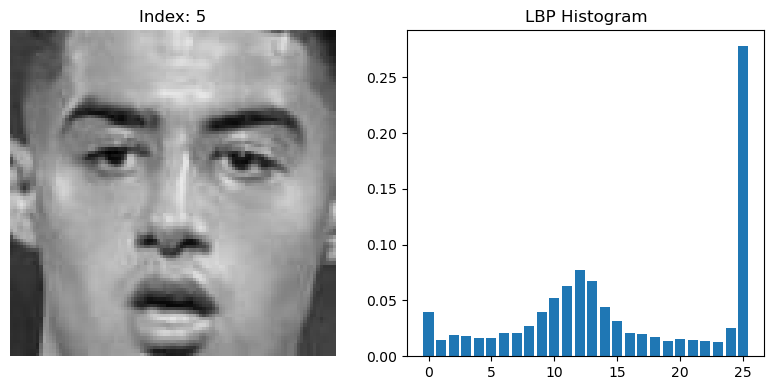

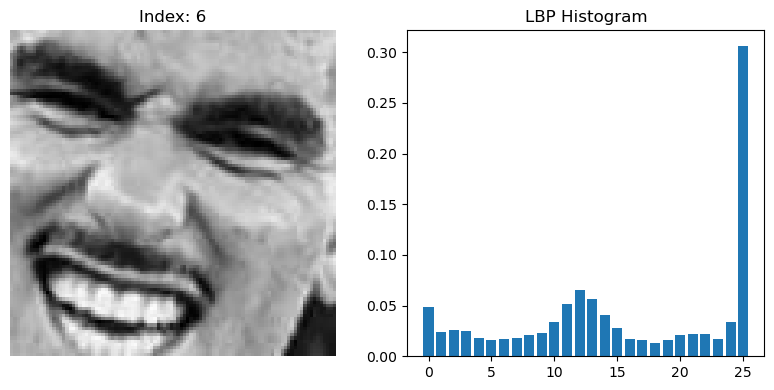

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Définir une fonction pour extraire les caractéristiques LBP d'une image
def extract_lbp_hist(image):
    # Vérifier si l'image est en niveaux de gris
    if len(image.shape) > 2 and image.shape[2] > 1:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # L'image est déjà en niveaux de gris
    
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalisation
    return hist


# Afficher une image aléatoire de chaque indice avec son histogramme LBP
unique_indices = np.unique(labels)
num_images_to_display = 1

for index in unique_indices:
    # Obtenir les indices des images correspondant à cet index
    indices_for_index = np.where(labels == index)[0]
    
    # Choisir une image aléatoire de cet index
    chosen_indices = np.random.choice(indices_for_index, num_images_to_display, replace=False)
    
    for chosen_index in chosen_indices:
        # Charger l'image et extraire son histogramme LBP
        image = images[chosen_index]
        lbp_hist = extract_lbp_hist(image)
        
        # Afficher l'image et son histogramme LBP
        plt.figure(figsize=(8, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Index: {index}")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.bar(range(len(lbp_hist)), lbp_hist)
        plt.title("LBP Histogram")
        
        plt.tight_layout()
        plt.show()


SVM Prediction: Bono
KNN Prediction: Bono


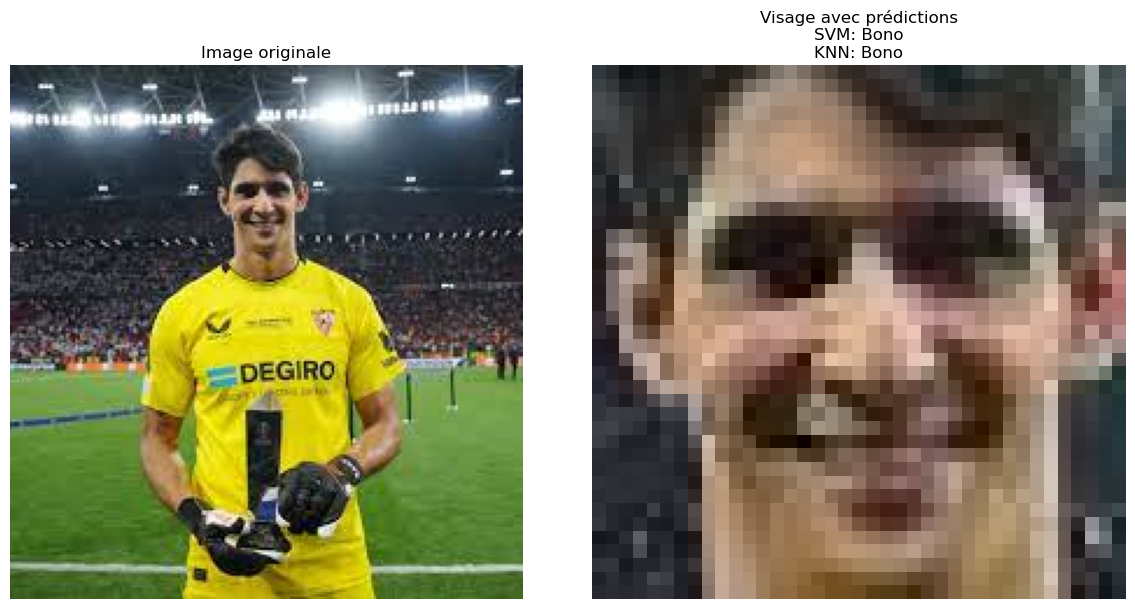

In [55]:
import cv2
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Charger le fichier cascade XML pour la détection de visages
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Fonction pour extraire le visage en utilisant le fichier cascade
def extract_face(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Détecter les visages dans l'image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        return face, x, y, w, h

# Fonction pour extraire les caractéristiques LBP d'une image
def extract_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalisation
    return hist.reshape(1, -1)

# Chemin de l'image à tester
image_to_test_path = 'C:\\Users\\Epssilony\\Downloads\\bon.jpg'

# Extraire le visage de l'image avec le fichier cascade
face, x, y, w, h = extract_face(image_to_test_path)

# Extraire les caractéristiques LBP du visage
lbp_features = extract_lbp_features(face)

# Associer les indices prédits aux noms des joueurs à l'aide de dictionnaires
player_names = {
    0: "Walid Regragui",
    1: "Bono",
    2: "Achraf Hakimi",
    3: "Aguerd",
    4: "Sais",
    5: "Zaoury",
    6: "Cha3koka"
}

# Prédire avec SVM
svm_predicted_index = best_model.predict(lbp_features)[0]
svm_predicted_player = player_names[svm_predicted_index]

# Prédire avec KNN
knn_predicted_index = best_knn_model.predict(lbp_features)[0]
knn_predicted_player = player_names[knn_predicted_index]
# Afficher les prédictions à l'extérieur de l'image
print(f"SVM Prediction: {svm_predicted_player}")
print(f"KNN Prediction: {knn_predicted_player}")
# Convertir l'image de BGR à RGB pour Matplotlib
face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

# Charger l'image originale
original_image = cv2.imread(image_to_test_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Créer une disposition en grille avec Matplotlib pour afficher les deux images côte à côte
plt.figure(figsize=(12, 6))

# Afficher l'image originale à gauche
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.axis('off')
plt.title('Image originale')

# Afficher le visage avec les prédictions à droite
plt.subplot(1, 2, 2)
plt.imshow(face_rgb)
plt.axis('off')
plt.title(f"Visage avec prédictions\nSVM: {svm_predicted_player}\nKNN: {knn_predicted_player}")

plt.tight_layout()
plt.show()

SVM Prediction: Achraf Hakimi
KNN Prediction: Walid Regragui


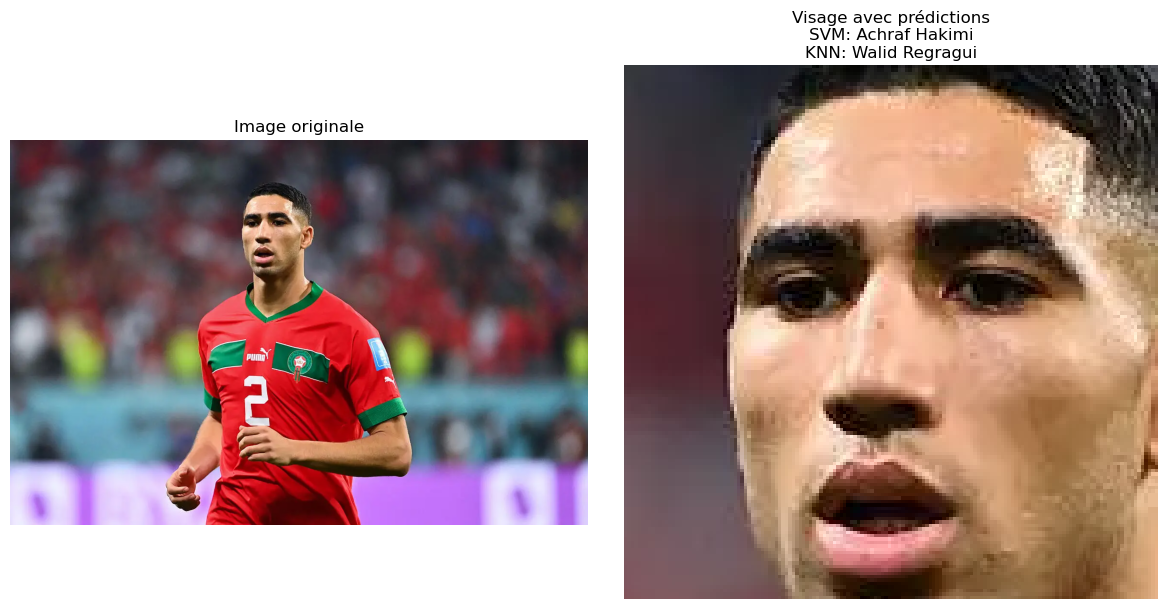

In [72]:
import cv2
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Charger le fichier cascade XML pour la détection de visages
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Fonction pour extraire le visage en utilisant le fichier cascade
def extract_face(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Détecter les visages dans l'image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        return face, x, y, w, h

# Fonction pour extraire les caractéristiques LBP d'une image
def extract_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalisation
    return hist.reshape(1, -1)

# Chemin de l'image à tester
image_to_test_path = 'C:\\Users\\Epssilony\\Downloads\\hak.jpg'

# Extraire le visage de l'image avec le fichier cascade
face, x, y, w, h = extract_face(image_to_test_path)

# Extraire les caractéristiques LBP du visage
lbp_features = extract_lbp_features(face)

# Associer les indices prédits aux noms des joueurs à l'aide de dictionnaires
player_names = {
    0: "Walid Regragui",
    1: "Bono",
    2: "Achraf Hakimi",
    3: "Aguerd",
    4: "Sais",
    5: "Zaoury",
    6: "Cha3koka"
}

# Prédire avec SVM
svm_predicted_index = best_model.predict(lbp_features)[0]
svm_predicted_player = player_names[svm_predicted_index]

# Prédire avec KNN
knn_predicted_index = best_knn_model.predict(lbp_features)[0]
knn_predicted_player = player_names[knn_predicted_index]
# Afficher les prédictions à l'extérieur de l'image
print(f"SVM Prediction: {svm_predicted_player}")
print(f"KNN Prediction: {knn_predicted_player}")
# Convertir l'image de BGR à RGB pour Matplotlib
face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

# Charger l'image originale
original_image = cv2.imread(image_to_test_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12, 6))

# Afficher l'image originale à gauche
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.axis('off')
plt.title('Image originale')

# Afficher le visage avec les prédictions à droite
plt.subplot(1, 2, 2)
plt.imshow(face_rgb)
plt.axis('off')
plt.title(f"Visage avec prédictions\nSVM: {svm_predicted_player}\nKNN: {knn_predicted_player}")

plt.tight_layout()
plt.show()